In [ ]:
import pandas as pd
import seaborn as srn
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Exploração de dados 1:
  1) Verificação do tamanho do DataFrame e conhecer cada atributo.
  
  2) Verificação de dados faltantes (NA's) ---> Não há dados faltantes
  
  3) Verificação de colunas com valor único ---> Há colunas com valores únicos: "EmployeeCount" e "StandardHour"

In [ ]:
#Importação do DataBase:
df = pd.read_csv("Human_Resources.csv")

In [ ]:
pd.set_option("display.max_columns", None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

---> Não há dados faltantes

In [ ]:
df.groupby("Attrition").size()

Attrition
No     1233
Yes     237
dtype: int64

---> De acordo com a "regra de 10", o modelo ideal deve ter 23 ou 24 características!

---> Os dados estão balanceados.

In [ ]:
# Separação entre características categóricas e numéricas:
carac_num = []
carac_cat = []

def separa_carac (column):
  if df[column].dtypes == "int64":
    carac_num.append(column)
  else:
    carac_cat.append(column)
# Verificarei posteriormente se realmente as colunas com dtype object não são na verdade int64 e vice-versa.

In [ ]:
columns = df.columns.tolist()

In [ ]:
for column in columns:
  separa_carac(column)

In [ ]:
#Características numéricas:
carac_num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
#Verificação:
df_num = df[carac_num]
df_num
#A coluna "Education" seria conceitualmente categórica.
#Deixarei ela como numéricas pois transformarei as características categóricas para números.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
#Características categóricas:
carac_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
#Verificação:
df_cat = df[carac_cat]
df_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


# Escalonamento de dados:

In [ ]:
label = LabelEncoder()
for features in carac_cat:
  df[features] = label.fit_transform(df[features])

In [ ]:
#Transformando o type de object para int64:
def trans_to_int (column):
  df[column] = df[column].astype("int64")

for carac in carac_cat:
  trans_to_int(carac)

# Exploração de dados 2:

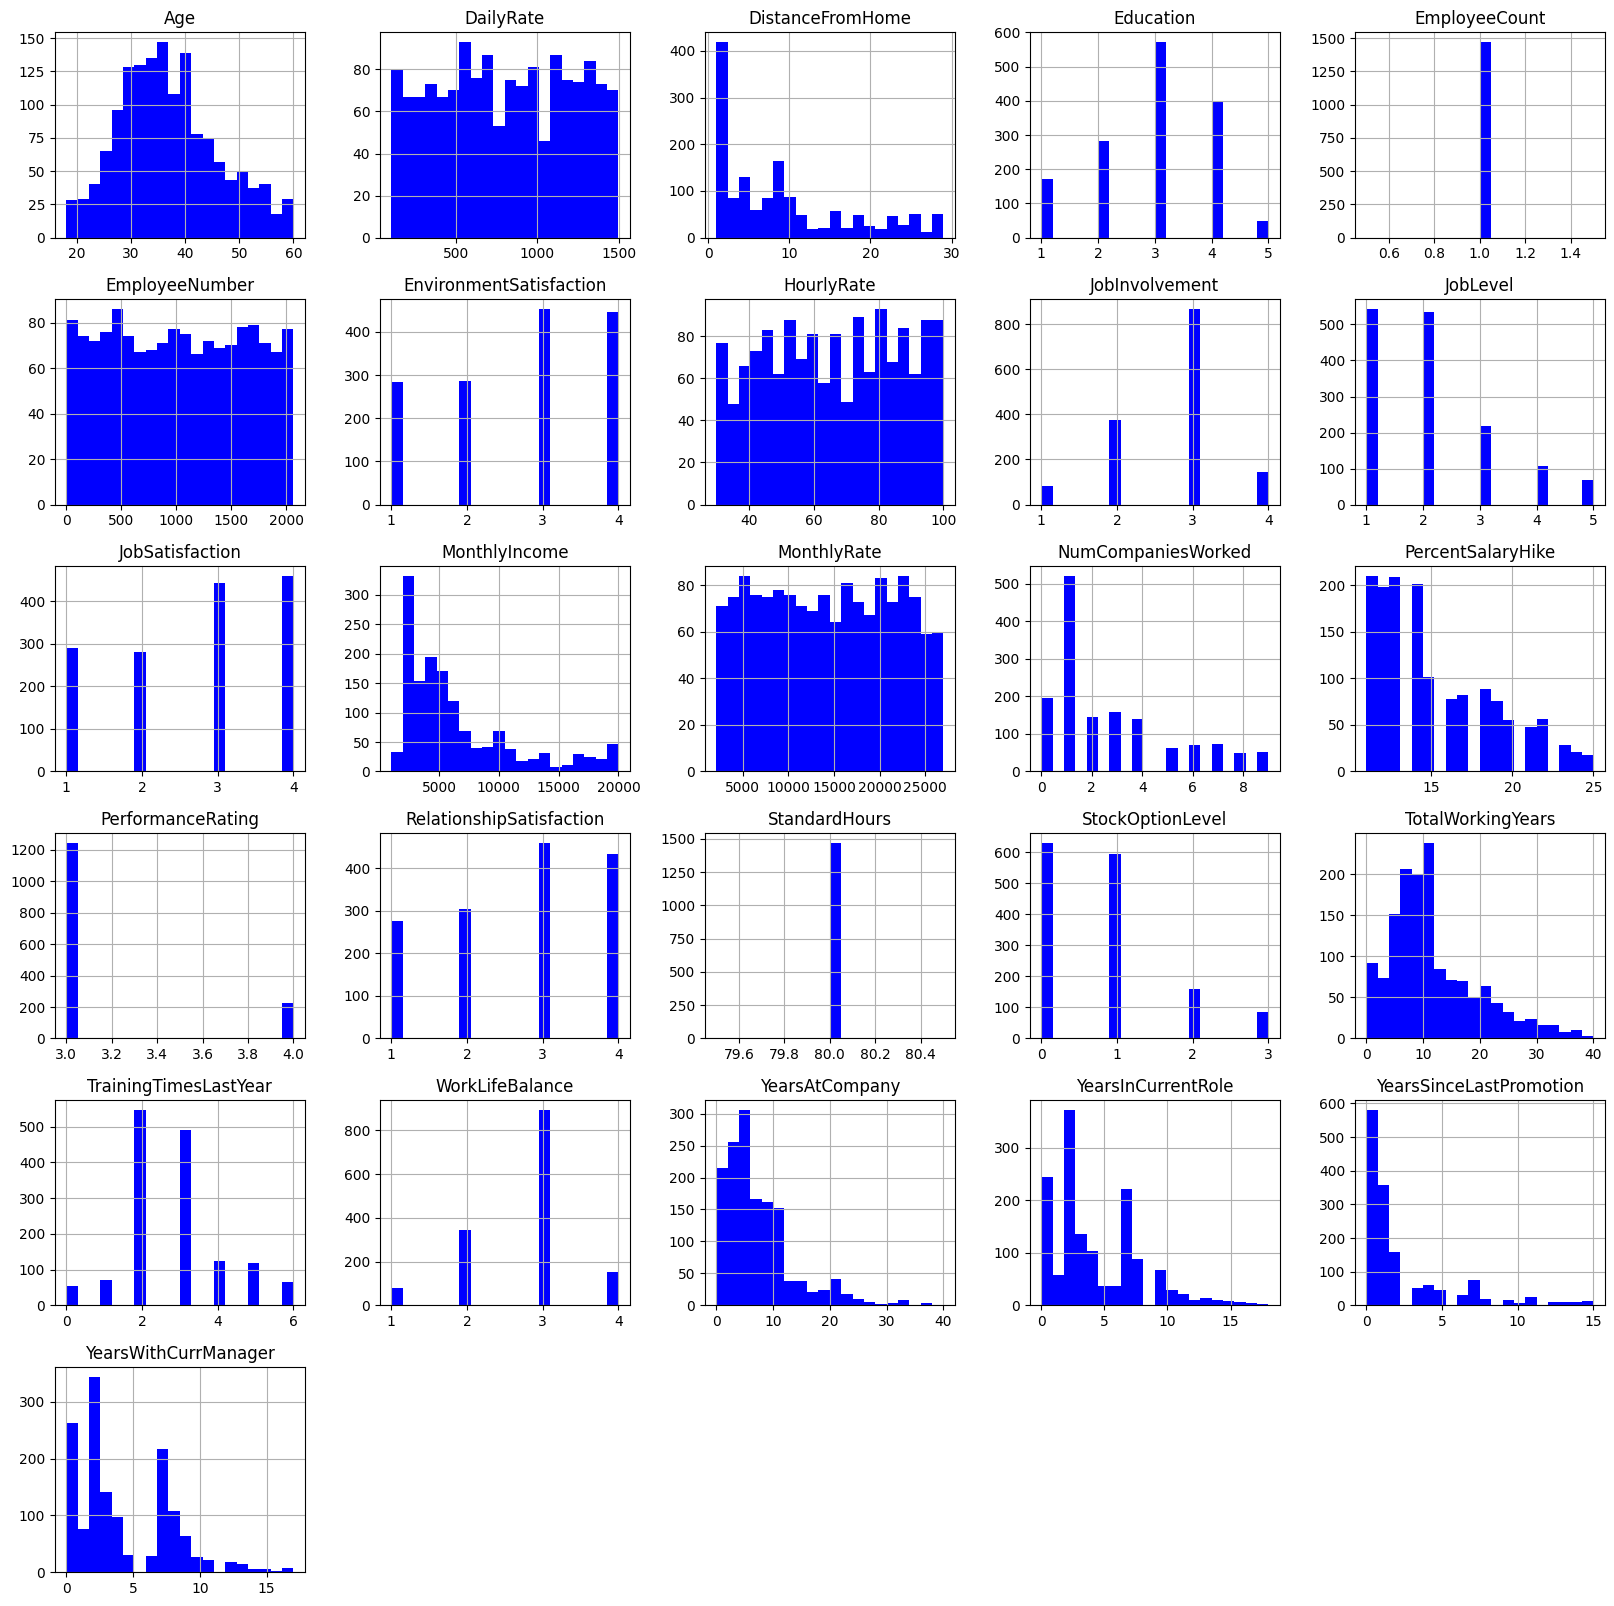

In [ ]:
#Distribuição das características:
df_num.hist( bins=20 , figsize=(20,20), color='blue');
#Comentário: À primeira vista não há nenhuma característica distribuida normalmente.

---> Os dados presentes na coluna "EmployeeCount", "StandardHours" e "Over18" são iguais para todas as linhas.

---> A coluna "EmployeeNumber" é a contagem do número de colaboradores.

---> As três colunas mencionadas acima podem ser removidas pois não agregam para classificar colaboradores que vão sair da empresa.

# Tratamento de dados 1:
  1) Excluir colunas: "EmployeeCount", "StandardHours", "Over18" e "EmployeeNumber"
  
  2) Transformação das colunas "Attrition" e "OverTime" em uma variável numérica.

In [ ]:
df.drop( columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], inplace=True)

# Exploração de dados 2:
  4) Verificação de correlações entre variáveis numéricas:

  5) TestT:
  
  6) Verificação de Outliers geral ---> Há Outliers em "MonthlyIncome"! Dados são corretos pois são de JobLevels alto

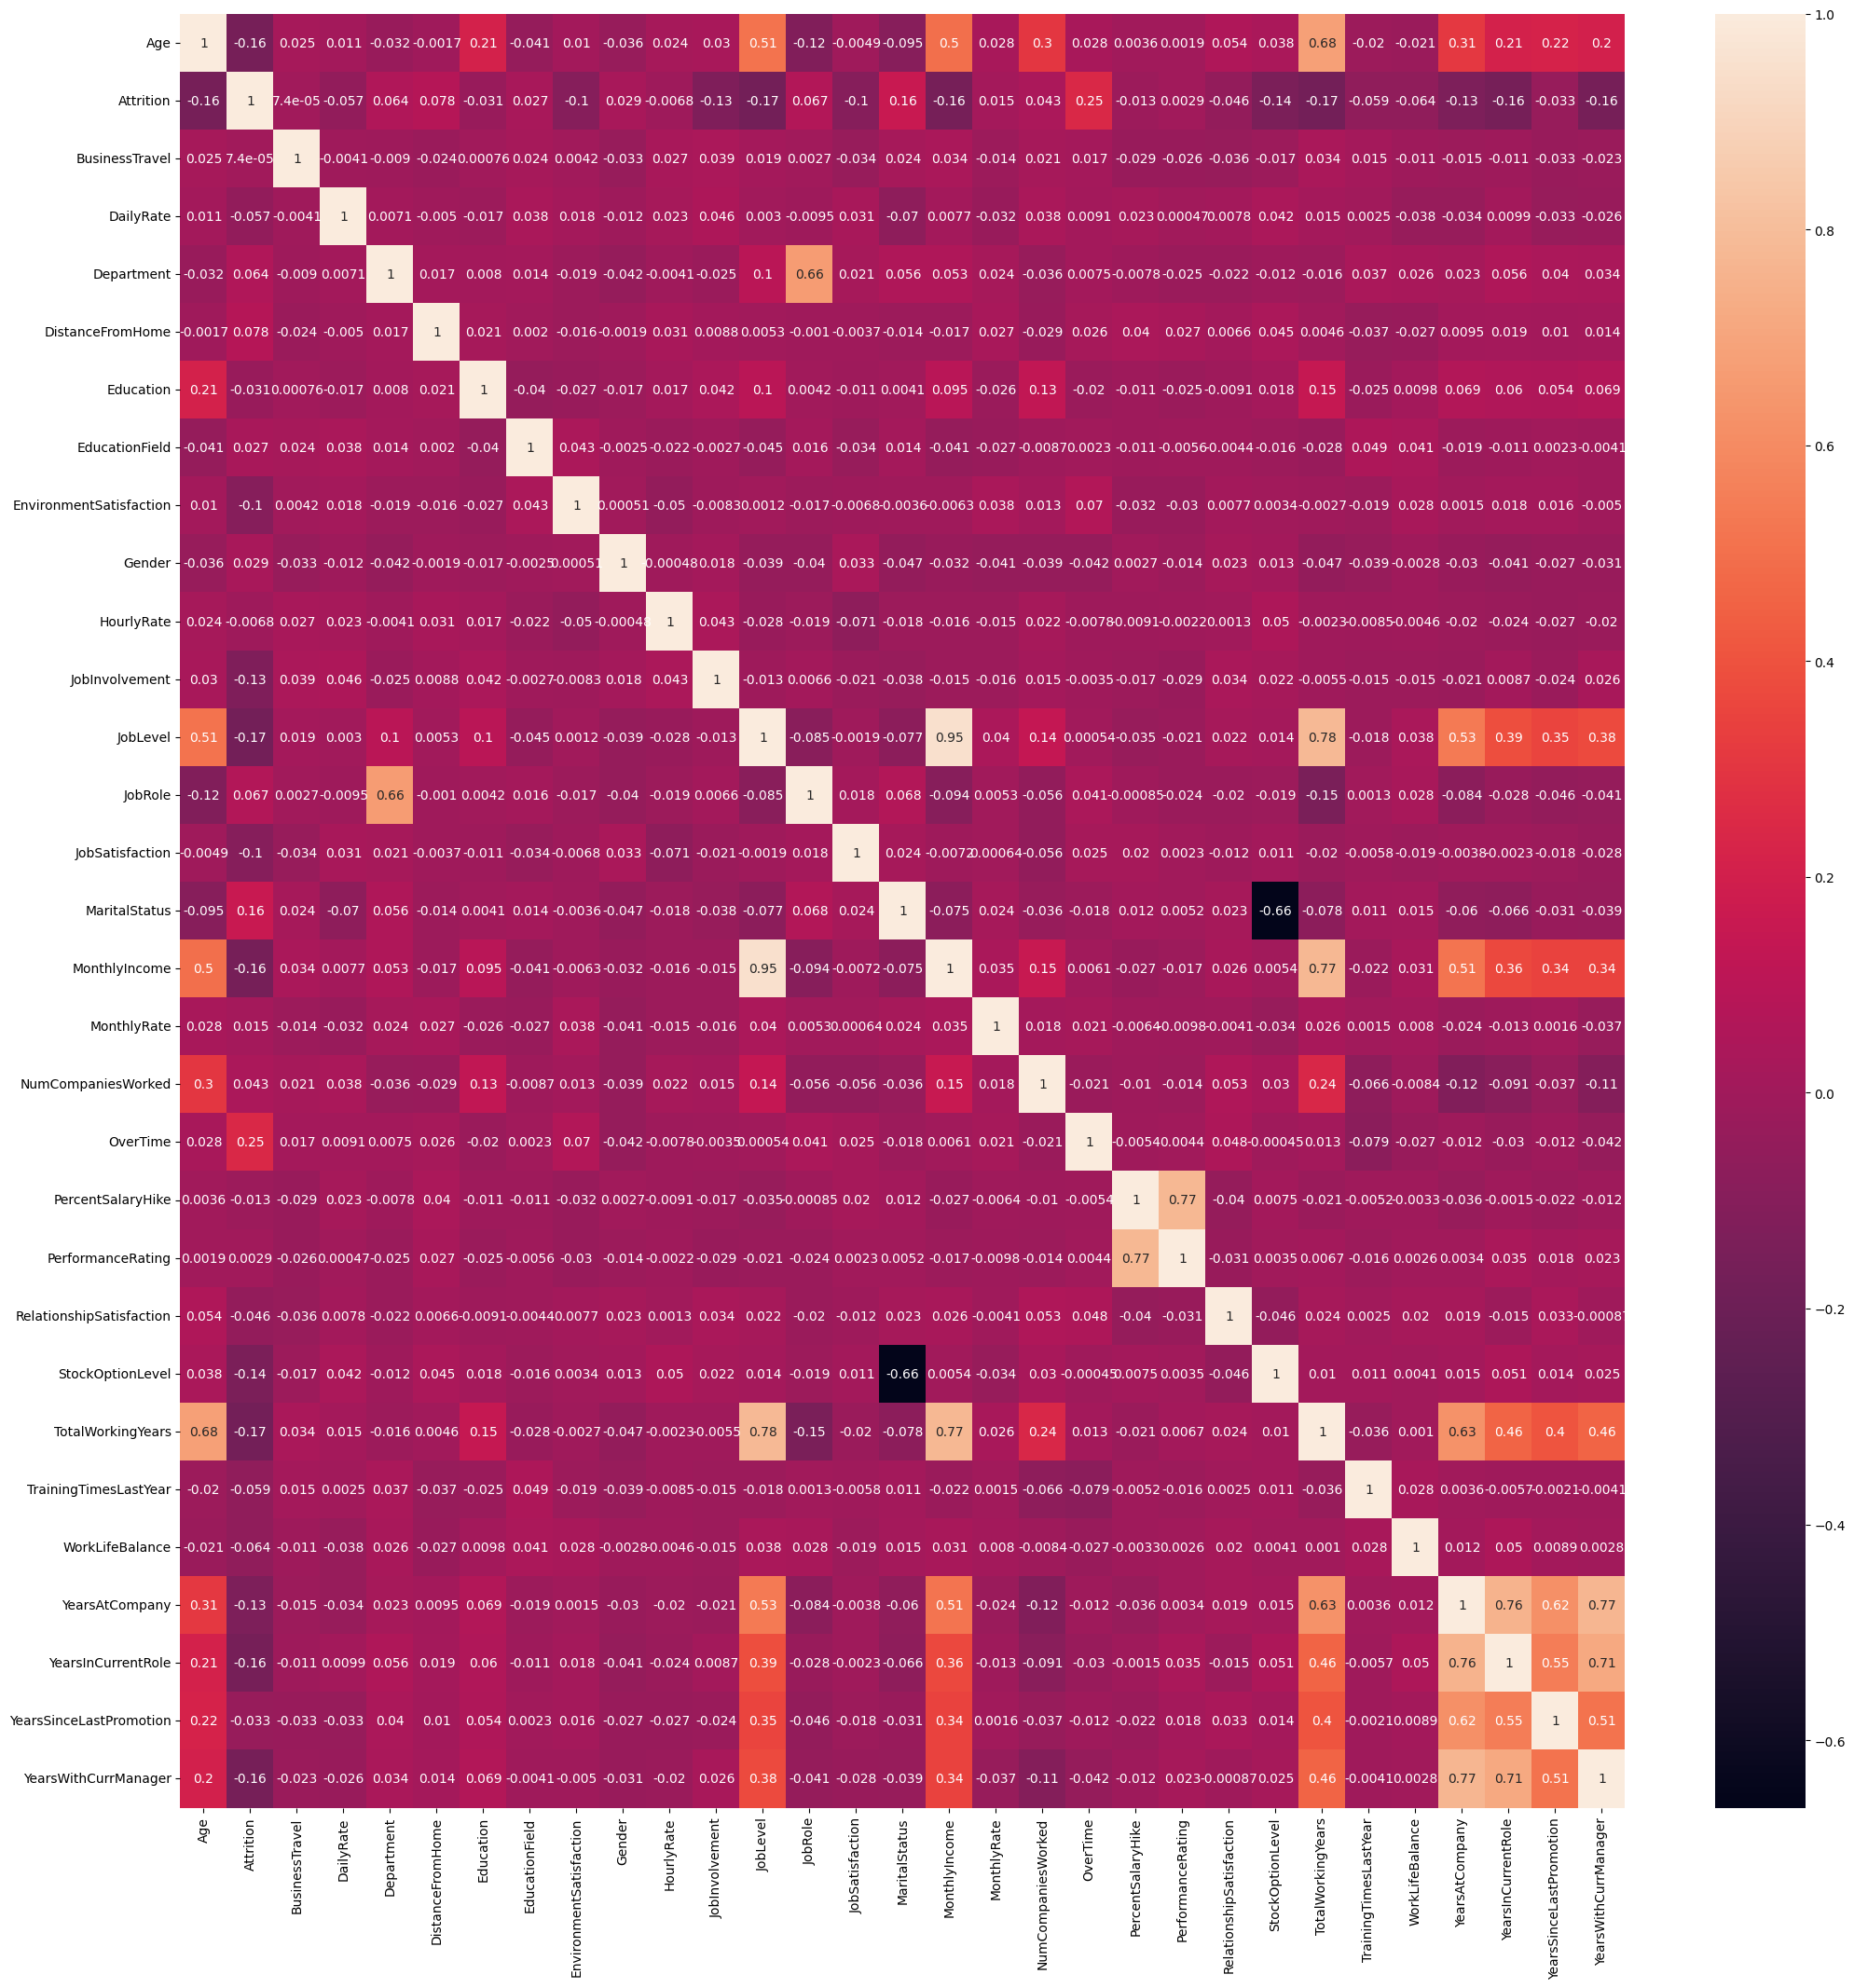

In [ ]:
#Correlações:
correlations = df.corr()
f, ax = plt.subplots(figsize=(25,25))
srn.heatmap(correlations, annot=True);
#Há multicolinearidade de características!

Características multicolineares - correlações fortes:

1) YearsAtCompany X YearsWithCurrManager:

2) YearsInCurrRole X YearsWithCurreManager:

3) YearInCurrRole X YearsAtCompany:

4) TotalWorkingYears X JobLevel:

5) TotalWorkingYears X MonthlyIncome:

6) PerformancingRate X PercentSalaryHike:

7) JobRole X Department:

In [ ]:
#Test-T:
features_response = ["Age", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField",
                     "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction",
                     "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "OverTime", "PercentSalaryHike",
                     "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
                     "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
X_exp = df[features_response]

In [ ]:
y_exp = df["Attrition"]

In [ ]:
f_stat, f_p_value = f_classif(X_exp, y_exp)

In [ ]:
f_test_df = pd.DataFrame({"Feature":features_response,
                         "F statistic": f_stat,
                         "p value": f_p_value}
                         )

In [ ]:
f_test_df.sort_values("p value")

,Feature,F statistic,p value
18,OverTime,94.656457,1.009254e-21
23,TotalWorkingYears,44.252491,4.061878e-11
11,JobLevel,43.215344,6.795385e-11
14,MaritalStatus,39.599763,4.106015e-10
27,YearsInCurrentRole,38.838303,6.003186e-10
15,MonthlyIncome,38.488819,7.147364e-10
0,Age,38.175887,8.356308e-10
29,YearsWithCurrManager,36.712311,1.736987e-09
22,StockOptionLevel,28.140501,1.301015e-07
26,YearsAtCompany,27.001624,2.318872e-07


In [ ]:
#As possíveis melhores características preditivas são:
best_features = f_test_df.loc[f_test_df["p value"] <= 0.05, "Feature"]
best_features = best_features.tolist()
best_features

['Age',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

Para Regressão Logística ---> Características multicolineares - correlações fortes:

1) YearsAtCompany X YearsWithCurrManager: Excluir YearsWithCurrManager

2) YearsInCurrRole X YearsWithCurreManager: Excluir YearsWithCurrManager

3) YearInCurrRole X YearsAtCompany: Excluir YearsAtCompany

4) TotalWorkingYears X JobLevel: Excluir TotalWorkingYears

5) TotalWorkingYears X MonthlyIncome: Excluir TotalWorkingYears

6) PerformancingRate X PercentSalaryHike:

7) JobRole X Department: Não é necessário excluir.

# Exploração de características:

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
group_by_TotalWorkingYears = df.groupby("TotalWorkingYears").agg({"Attrition": np.mean})
group_by_TotalWorkingYears

,Attrition
TotalWorkingYears,
0,0.454545
1,0.493827
2,0.290323
3,0.214286
4,0.190476
5,0.181818
6,0.176000
7,0.222222
8,0.155340


In [ ]:
group_by_TotalWorkingYears = group_by_TotalWorkingYears.drop([40])

In [ ]:
p = group_by_TotalWorkingYears["Attrition"].values
p

array([0.45454545, 0.49382716, 0.29032258, 0.21428571, 0.19047619,
       0.18181818, 0.176     , 0.22222222, 0.15533981, 0.10416667,
       0.12376238, 0.19444444, 0.10416667, 0.08333333, 0.12903226,
       0.125     , 0.08108108, 0.09090909, 0.14814815, 0.13636364,
       0.06666667, 0.02941176, 0.0952381 , 0.09090909, 0.16666667,
       0.07142857, 0.07142857, 0.        , 0.07142857, 0.        ,
       0.        , 0.11111111, 0.        , 0.14285714, 0.2       ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
q = 1-p
q

array([0.54545455, 0.50617284, 0.70967742, 0.78571429, 0.80952381,
       0.81818182, 0.824     , 0.77777778, 0.84466019, 0.89583333,
       0.87623762, 0.80555556, 0.89583333, 0.91666667, 0.87096774,
       0.875     , 0.91891892, 0.90909091, 0.85185185, 0.86363636,
       0.93333333, 0.97058824, 0.9047619 , 0.90909091, 0.83333333,
       0.92857143, 0.92857143, 1.        , 0.92857143, 1.        ,
       1.        , 0.88888889, 1.        , 0.85714286, 0.8       ,
       1.        , 1.        , 1.        , 1.        ])

In [ ]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds = log_odds.tolist()

<ipython-input-30-9f278f300716>:2: RuntimeWarning: divide by zero encountered in log
  log_odds = np.log(odds_ratio)


In [ ]:
tran = [float(x)**0.5 for x in group_by_TotalWorkingYears.index]
tran

[0.0,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0,
 3.1622776601683795,
 3.3166247903554,
 3.4641016151377544,
 3.605551275463989,
 3.7416573867739413,
 3.872983346207417,
 4.0,
 4.123105625617661,
 4.242640687119285,
 4.358898943540674,
 4.47213595499958,
 4.58257569495584,
 4.69041575982343,
 4.795831523312719,
 4.898979485566356,
 5.0,
 5.0990195135927845,
 5.196152422706632,
 5.291502622129181,
 5.385164807134504,
 5.477225575051661,
 5.5677643628300215,
 5.656854249492381,
 5.744562646538029,
 5.830951894845301,
 5.916079783099616,
 6.0,
 6.082762530298219,
 6.164414002968976]

In [ ]:
group_by_TotalWorkingYears.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38],
           dtype='int64', name='TotalWorkingYears')

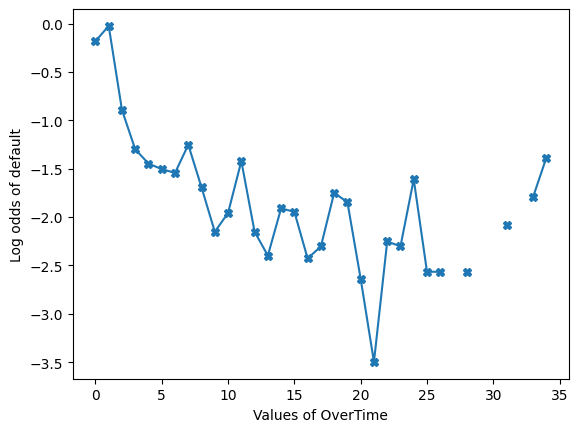

In [ ]:
plt.plot(group_by_TotalWorkingYears.index, log_odds, "-X")
plt.ylabel("Log odds of default")
plt.xlabel("Values of OverTime");

In [ ]:
df_TotalWorkingYears_1 = pd.DataFrame(group_by_TotalWorkingYears.index)
df_TotalWorkingYears_2 = pd.DataFrame(log_odds, columns=["log_odds"])

In [ ]:
df_TotalWorkingYears = pd.concat([df_TotalWorkingYears_1, df_TotalWorkingYears_2], axis=1)

In [ ]:
df_TotalWorkingYears

,TotalWorkingYears,log_odds
0,0,-0.182322
1,1,-0.024693
2,2,-0.893818
3,3,-1.299283
4,4,-1.446919
5,5,-1.504077
6,6,-1.543687
7,7,-1.252763
8,8,-1.693319
9,9,-2.151762


In [ ]:
correlations = df_TotalWorkingYears.corr()
correlations

,TotalWorkingYears,log_odds
TotalWorkingYears,1.000000,-0.586352
log_odds,-0.586352,1.000000


In [ ]:
df_TotalWorkingYears_3 = pd.DataFrame(tran, columns=["TotalWorkingYears_sqrt"])
df_TotalWorkingYears_4 = pd.DataFrame(log_odds, columns=["log_odds"])

In [ ]:
df_TotalWorkingYears_sqrt = pd.concat([df_TotalWorkingYears_3, df_TotalWorkingYears_4], axis=1)
df_TotalWorkingYears_sqrt

,TotalWorkingYears_sqrt,log_odds
0,0.000000,-0.182322
1,1.000000,-0.024693
2,1.414214,-0.893818
3,1.732051,-1.299283
4,2.000000,-1.446919
5,2.236068,-1.504077
6,2.449490,-1.543687
7,2.645751,-1.252763
8,2.828427,-1.693319
9,3.000000,-2.151762


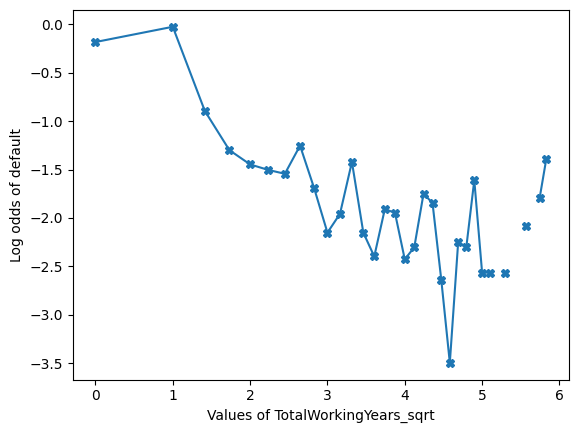

In [ ]:
plt.plot(tran, log_odds, "-X")
plt.ylabel("Log odds of default")
plt.xlabel("Values of TotalWorkingYears_sqrt");

In [ ]:
correlations = df_TotalWorkingYears_sqrt.corr()
correlations

,TotalWorkingYears_sqrt,log_odds
TotalWorkingYears_sqrt,1.000000,-0.709001
log_odds,-0.709001,1.000000


# Outliers:

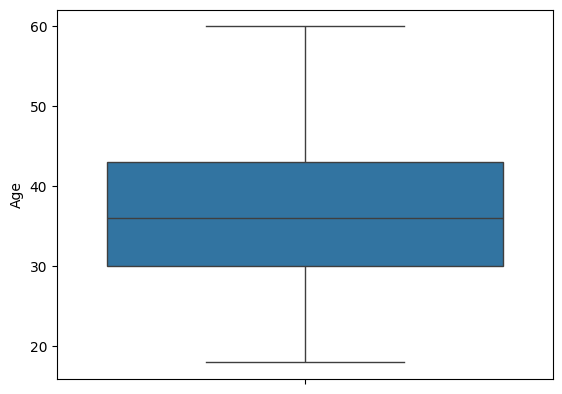

In [ ]:
#Outliers: Age
srn.boxplot(data=df,
            y="Age",
           );

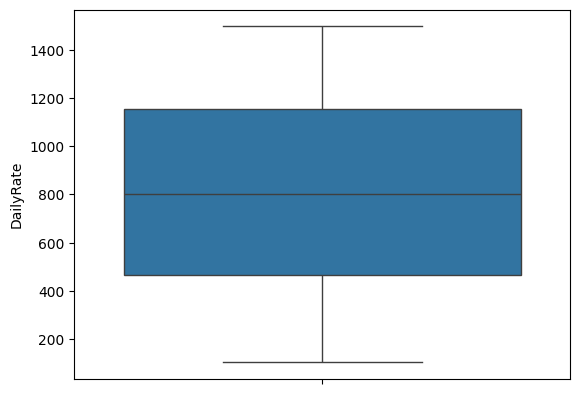

In [ ]:
srn.boxplot(data=df,
            y="DailyRate",
           );

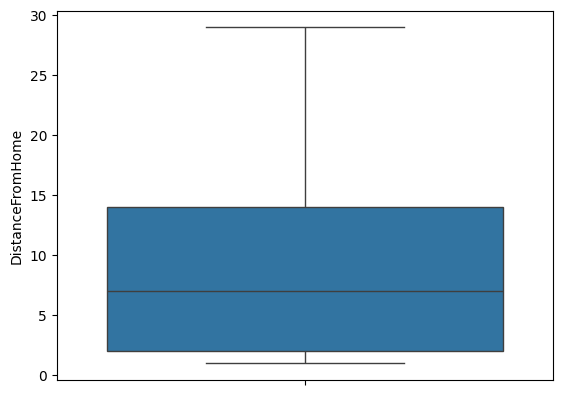

In [ ]:
srn.boxplot(data=df,
            y="DistanceFromHome",
           );

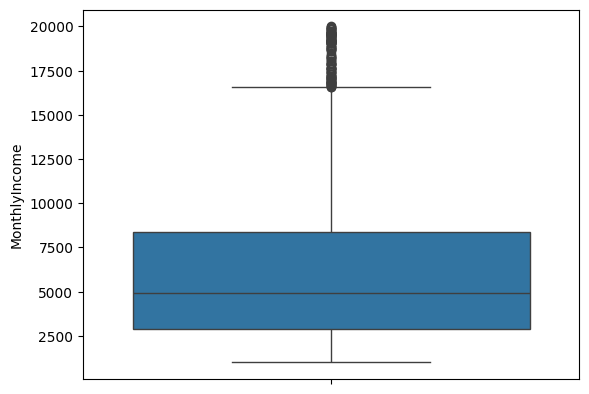

In [ ]:
srn.boxplot(data=df,
            y="MonthlyIncome",
           );

In [ ]:
df_mi = df.loc[df["MonthlyIncome"] >= 15000]

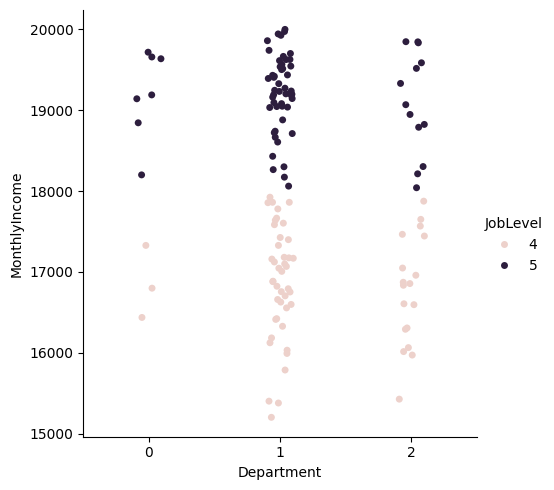

In [ ]:
#Análise dos Outliers do BoxPlot de "MonthlyIncome" acima.
srn.catplot(data=df_mi,
            x="Department",
            y="MonthlyIncome",
            hue="JobLevel",
           );
#Conclusão: Outliers são colaboradores com JobLevels mais altos 4 e 5.

# Exploração de dados 3:
  6) Verificação de Outliers por cada classe ---> Há Outliers em "Age" e "MonthlyIncome"
  
  -Age: Dados corretos ---> Pontos atípicos - Representam casos atípicos
  
  -MonthlyIncome: Dados corretos ---> Outliers são os colaboradores de alto JobLevel.

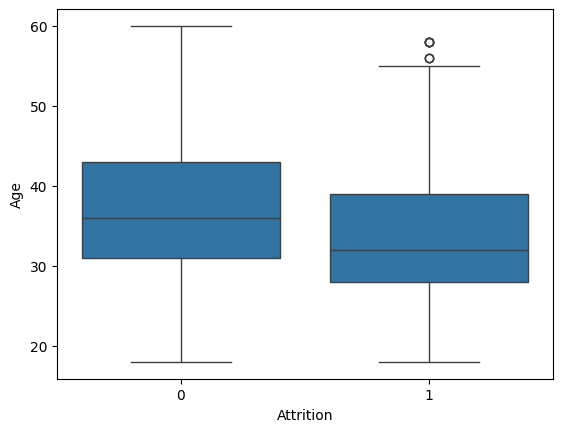

In [ ]:
#Verificação Outliers por cada classe - Age
srn.boxplot(data=df,
           x="Attrition",
           y="Age",
           );

In [ ]:
df_y = df.loc[df["Attrition"] == 1]
df_n = df.loc[df["Attrition"] == 0]

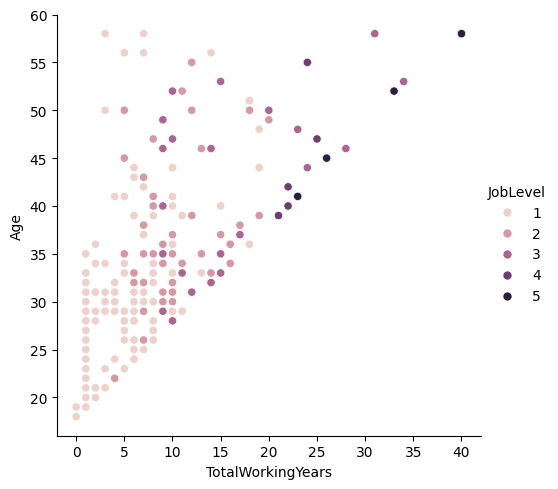

In [ ]:
srn.relplot(data=df_y,
            x="TotalWorkingYears",
            y="Age",
            hue="JobLevel"
            );

In [ ]:
df_y.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,2.464135,0.632911,65.573840,2.518987,1.637131,4.835443,2.468354,1.367089,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,0.584062,401.899519,0.571186,8.452525,1.008244,1.435520,1.169791,0.483031,20.099958,0.773405,0.940594,2.579731,1.118058,0.716226,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,1.000000,408.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,50.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,2.000000,699.000000,1.000000,9.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,1.000000,6.000000,3.000000,2.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,2.000000,1092.000000,2.000000,17.000000,4.000000,3.000000,4.000000,1.000000,84.000000,3.000000,2.000000,7.000000,3.000000,2.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,2.000000,1496.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
df_y_2 = df_y.loc[df["Age"] >= 55]
df_y_2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
122,56,1,2,441,1,14,4,1,2,0,72,3,1,6,2,1,4963,4510,9,1,18,3,1,3,7,2,3,5,4,4,3
126,58,1,2,147,1,23,4,3,4,0,94,3,3,0,4,1,10312,3465,1,0,12,3,4,1,40,3,2,40,10,15,6
568,55,1,2,725,1,2,3,3,4,1,78,3,5,3,1,1,19859,21199,5,1,13,3,4,1,24,2,3,5,2,1,4
595,58,1,2,286,1,2,4,1,4,1,31,3,5,5,2,2,19246,25761,7,1,12,3,4,0,40,2,3,31,15,13,8
608,55,1,2,436,2,2,1,3,3,1,37,3,2,7,4,2,5160,21519,4,0,16,3,3,0,12,3,2,9,7,7,3


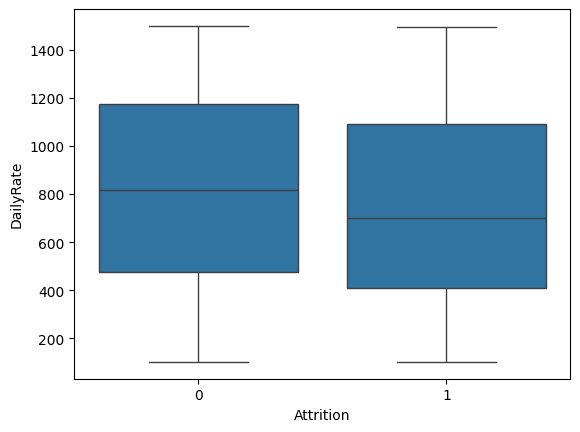

In [ ]:
#Verificação Outliers por cada classe - DailyRate
srn.boxplot(data=df,
           x="Attrition",
           y="DailyRate",
           );

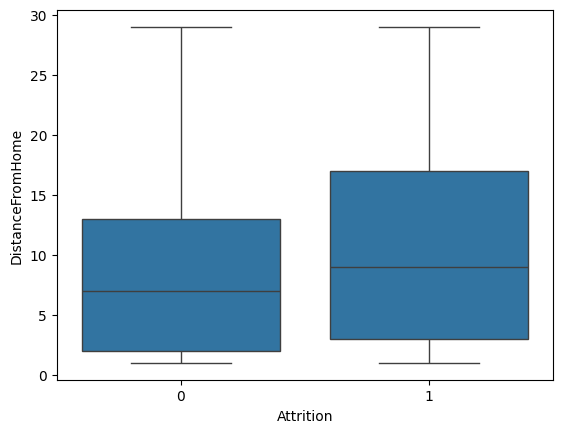

In [ ]:
#Verificação Outliers por cada classe - DistanceFromHome
srn.boxplot(data=df,
           x="Attrition",
           y="DistanceFromHome",
           );

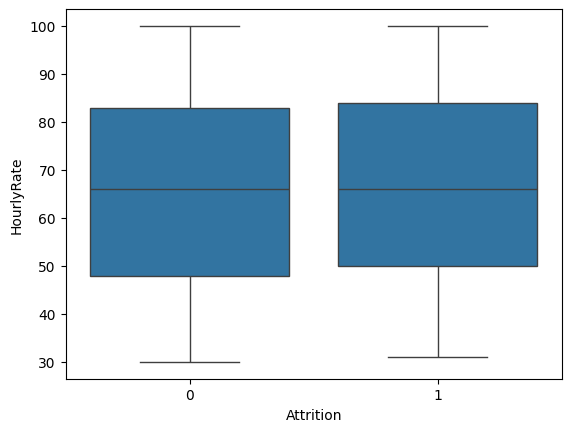

In [ ]:
#Verificação Outliers por cada classe - HourlyRate
srn.boxplot(data=df,
           x="Attrition",
           y="HourlyRate",
           );

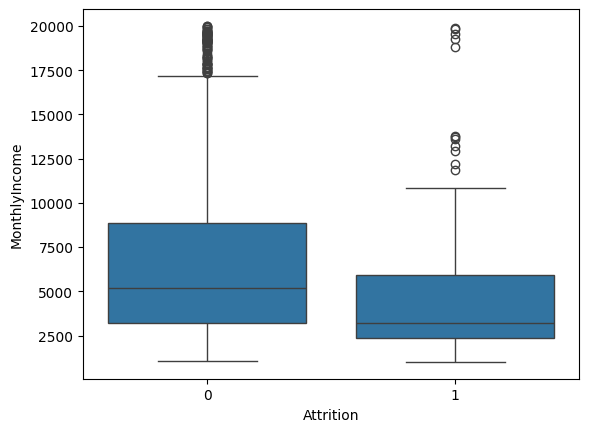

In [ ]:
#Verificação Outliers por cada classe - MonthlyIncome
srn.boxplot(data=df,
           x="Attrition",
           y="MonthlyIncome",
           );

In [ ]:
df_y_mi = df_y.loc[df_y["MonthlyIncome"] >= 11250]
df_n_mi = df_n.loc[df_n["MonthlyIncome"] >= 16250]

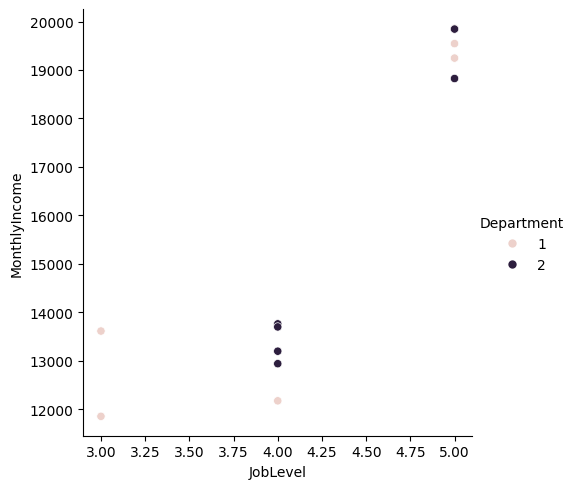

In [ ]:
#Verificação Outliers Attrition = Yes - MonthlyIncome por JobLevel
#Utilizarei JobLevel por que há uma correlação forte entre MonthlyIncome e JobLevel.
    #Caso algum Outlier não seguir essa correlação seria necessário aprofundar a análise.
srn.relplot(data=df_y_mi,
            x="JobLevel",
            y="MonthlyIncome",
            hue="Department"
           );

In [ ]:
df_y_jl3 = df_y.loc[df_y["JobLevel"] == 3]
df_y_jl4 = df_y.loc[df_y["JobLevel"] == 4]
df_y_jl5 = df_y.loc[df_y["JobLevel"] == 5]

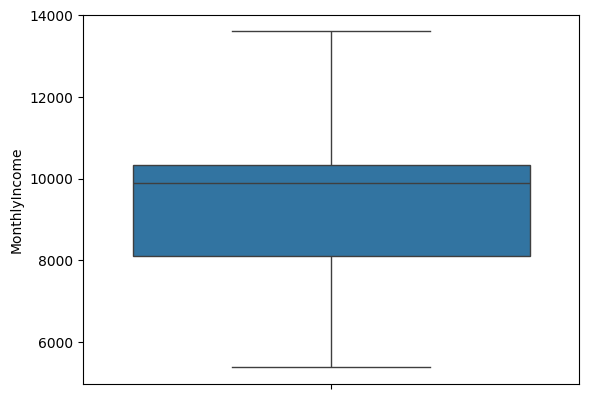

In [ ]:
#Verificação se há Outlier em JobLevel 3
srn.boxplot(data=df_y_jl3,
            y="MonthlyIncome",
           );
#Não há Outlier em JobLevel 3

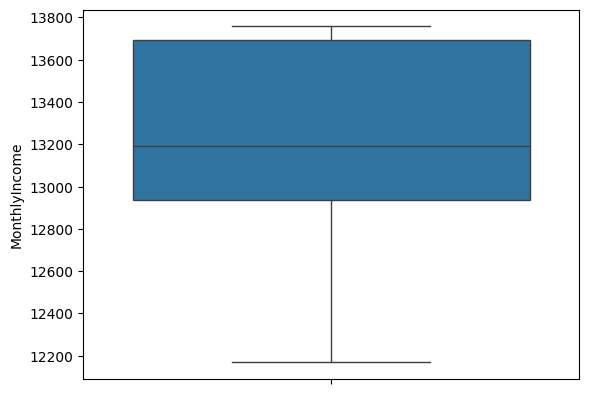

In [ ]:
#Verificação se há Outlier em JobLevel 4
srn.boxplot(data=df_y_jl4,
            y="MonthlyIncome",
           );
#Não há Outlier em JobLevel 4

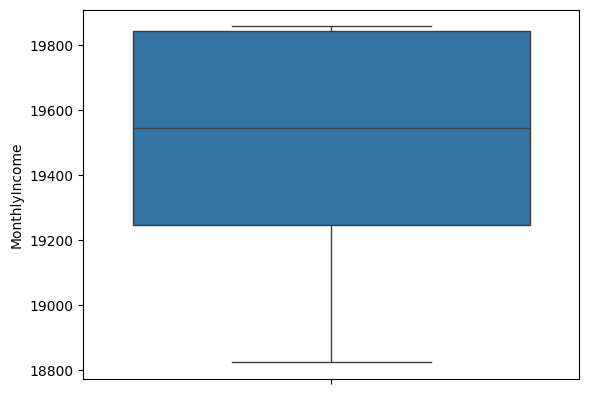

In [ ]:
#Verificação se há Outlier em JobLevel 5
srn.boxplot(data=df_y_jl5,
            y="MonthlyIncome",
           );
#Não há Outlier em JobLevel 5.

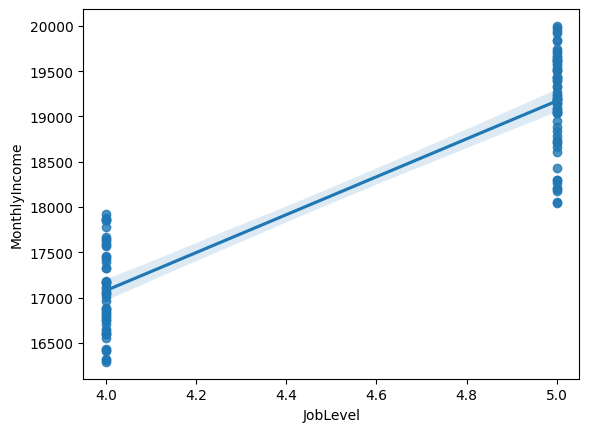

In [ ]:
#Verificação Outliers Attrition = No - MonthlyIncome por JobLevel
#Utilizarei JobLevel por que há uma correlação forte entre MonthlyIncome e JobLevel.
    #Caso algum Outlier não seguir essa correlação será necessário aprofundar a análise.
srn.regplot(data=df_n_mi,
            x="JobLevel",
            y="MonthlyIncome",
           );
# Outliers são colaboradores com JobLevel mais alto.

In [ ]:
df_n_jl4 = df_n.loc[df_n["JobLevel"] == 4]
df_n_jl5 = df_n.loc[df_n["JobLevel"] == 5]

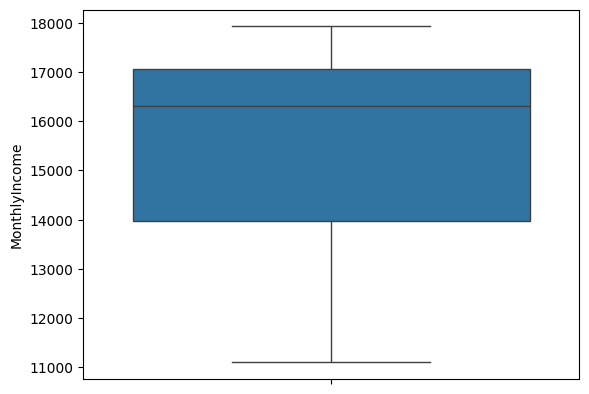

In [ ]:
srn.boxplot(data=df_n_jl4,
            y="MonthlyIncome",
           );
#Não há Outliers em JobLevel 4

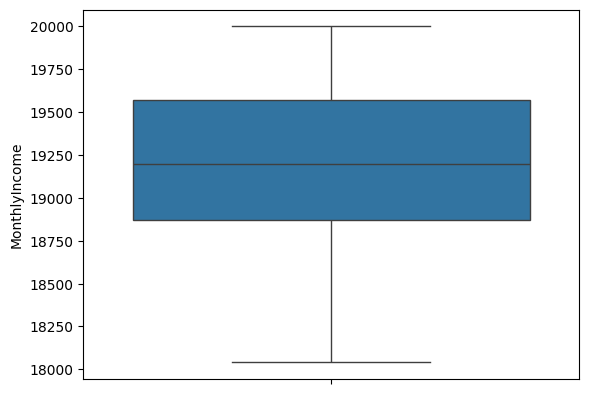

In [ ]:
srn.boxplot(data=df_n_jl5,
            y="MonthlyIncome",
           );
# Não há Outlier em JobLevel 5

# Exploração de dados 3:
  7) Insights

In [ ]:
print("Total de colaboradores é: ", len(df), "pessoas")
print("Total de colaboradores que saíram é: ", len(df_y), "pessoas")

formula1 = (len(df_y)/len(df))*100
string1 = f"Porcentagem de colaboradores que saíram é: {formula1:.1f}%"
print(string1)

print("Total de colaboradores que ficaram é: ", len(df_n), "pessoas")

formula2 = len(df_n)/len(df)*100
string2 = f"Porcentagem de colaboradores que saíram é: {formula2:.1f}%"
print(string2)

Total de colaboradores é:  1470 pessoas
Total de colaboradores que saíram é:  237 pessoas
Porcentagem de colaboradores que saíram é: 16.1%
Total de colaboradores que ficaram é:  1233 pessoas
Porcentagem de colaboradores que saíram é: 83.9%


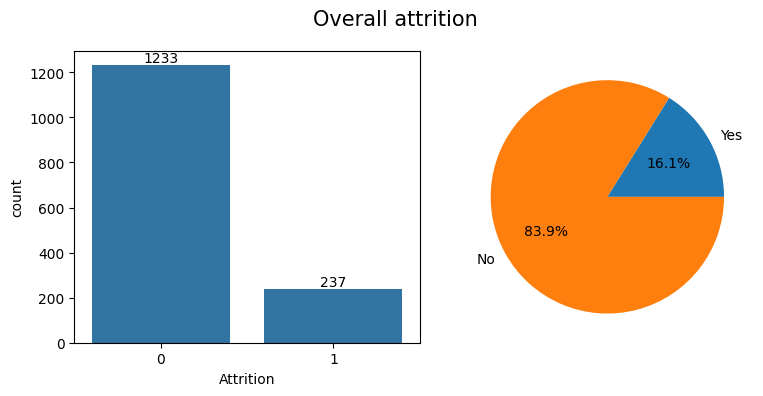

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4))
plot1 = srn.countplot(data=df, x="Attrition", ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container)
plot2 = plt.pie([len(df_y)/len(df)*100,len(df_n)/len(df)*100], labels=["Yes","No"], autopct='%1.1f%%')
plt.suptitle("Overall attrition",fontsize=15)
f.tight_layout()

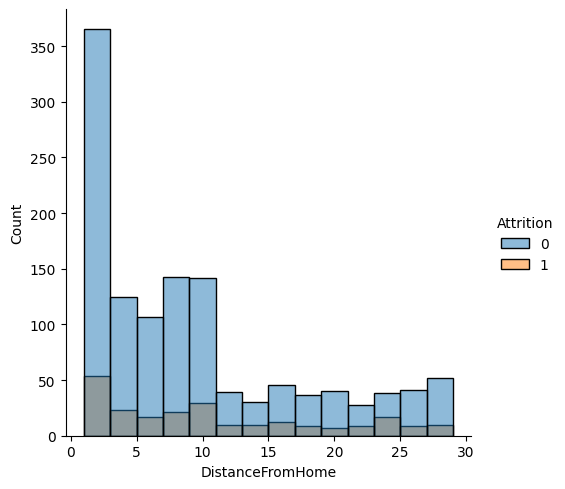

In [ ]:
srn.displot(df,
            x="DistanceFromHome",
            hue="Attrition",
            );
#Hipótese: A distância da casa até o trabalho influencia o colaborador a sair do atual emprego.

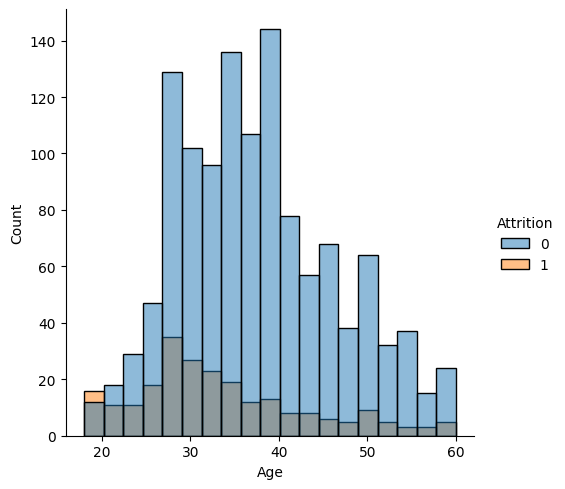

In [ ]:
srn.displot(df,
            x="Age",
            hue="Attrition"
            );
#Hipótese: Colaboradores mais novos têm churn maiores.

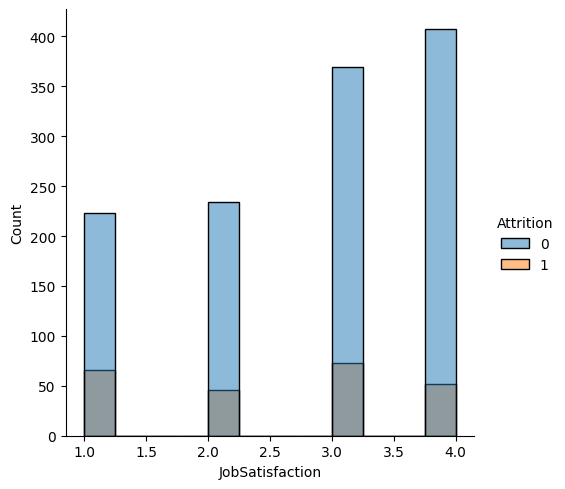

In [ ]:
srn.displot(df,
            x="JobSatisfaction",
            hue="Attrition"
            );
#Hipótese: Colaboradores mais insatisfeitos tendem a sair do atual emprego.

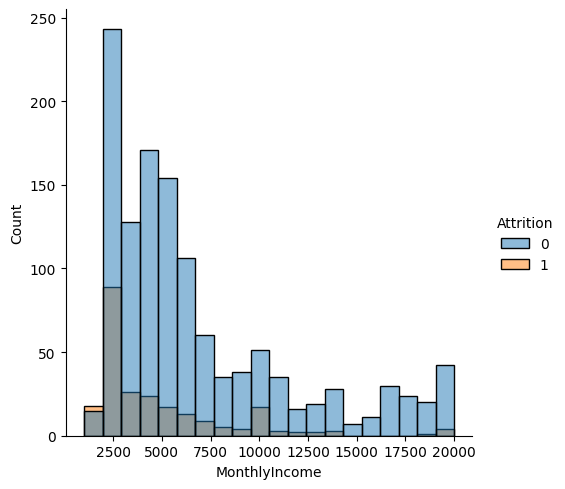

In [ ]:
srn.displot(df,
            x="MonthlyIncome",
            hue="Attrition"
            );
#Hipótese: Colaboradores que ganham menos tendem a sair do atual emprego.
#Comentário: Faz sentido essa hipótese ser verdadeira pois há um correlação moderada entre MonthlyIncome e Age.

Hipóteses:
  
  1)
  
  H0: Não existe diferença significativa de "DistanceFromHome" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Existe diferença significativa de "DistanceFromHome" entre os colaboradores que saíram e os que não saíram.
_____________________________________________________________________
  2)
  
  H0: Não existe diferença significativa de "Age" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Existe diferença significativa de "Age" entre os colaboradores que saíram e os que não saíram.
_____________________________________________________________________
  3)
  
  H0: Não existe diferença significativa de "JobSatisfaction" entre os colaboradores que saíram e os que não saíram.

  Ha: Existe diferença significativa de "JobSatisfaction" entre os colaboradores que saíram e os que não saíram.
______________________________________________________________________
  4)
  
  H0: Não existe diferença significativa de "MonthlyIncome" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Não existe diferença significativa de "MonthlyIncome" entre os colaboradores que saíram e os que não saíram.

In [ ]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu, ttest_ind

df_y_test = df_y["DistanceFromHome"]
df_n_test = df_n["DistanceFromHome"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval <0.05: return False
    return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Realizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "DistanceFromHome" entre os dois grupos de colaboradores.

Realizando U-Test...


MannwhitneyuResult(statistic=164225.5, pvalue=0.0023870470273627984)

In [ ]:
df_y_test = df_y["Age"]
df_n_test = df_n["Age"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "Age" entre os dois grupos de colaboradores.

Realizando t-test...


TtestResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10, df=1468.0)

In [ ]:
df_y_test = df_y["JobSatisfaction"]
df_n_test = df_n["JobSatisfaction"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "JobSatisfaction" entre os dois grupos de colaboradores.

Realizando t-test...


TtestResult(statistic=-3.9862267630568273, pvalue=7.04306674173115e-05, df=1468.0)

In [ ]:
df_y_test = df_y["MonthlyIncome"]
df_n_test = df_n["MonthlyIncome"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "MonthlyIncome" entre os dois grupos de colaboradores.

Relizando t-test com variancia diferente...


TtestResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13, df=412.74074755747006)

# Pré-processamento:

1) YearsAtCompany X YearsWithCurrManager: Excluir YearsWithCurrManager

2) YearsInCurrRole X YearsWithCurreManager: Excluir YearsWithCurrManager

3) YearInCurrRole X YearsAtCompany: Excluir YearsAtCompany

4) TotalWorkingYears X JobLevel: Excluir TotalWorkingYears

5) TotalWorkingYears X MonthlyIncome: Excluir TotalWorkingYears

6) PerformancingRate X PercentSalaryHike:

7) JobRole X Department: Não é necessário excluir.

In [ ]:
best_features

['Age',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [ ]:
best_cat = [features for features in best_features if features in carac_cat]
best_cat

['Department', 'JobRole', 'MaritalStatus', 'OverTime']

In [ ]:
df_cat = df[best_cat]
df_cat

,Department,JobRole,MaritalStatus,OverTime
0,2,7,2,1
1,1,6,1,0
2,1,2,2,1
3,1,6,1,1
4,1,2,1,0
...,...,...,...,...
1465,1,2,1,0
1466,1,0,1,0
1467,1,4,1,1
1468,2,7,1,0


In [ ]:
onehotencoder = OneHotEncoder()
df_cat = onehotencoder.fit_transform(df_cat).toarray()

In [ ]:
df_cat = pd.DataFrame(df_cat)

In [ ]:
best_num = [features for features in best_features if features not in carac_cat]
best_num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [ ]:
df_num = df[best_num]

In [ ]:
df_num

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1102,1,2,3,2,4,5993,0,8,0,1,6,4,5
1,49,279,8,3,2,2,2,5130,1,10,3,3,10,7,7
2,37,1373,2,4,2,1,3,2090,0,7,3,3,0,0,0
3,33,1392,3,4,3,1,3,2909,0,8,3,3,8,7,0
4,27,591,2,1,3,1,2,3468,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,3,4,2,4,2571,1,17,3,3,5,2,3
1466,39,613,6,4,2,3,1,9991,1,9,5,3,7,7,7
1467,27,155,4,2,4,2,2,6142,1,6,0,3,6,2,3
1468,49,1023,2,4,2,2,2,5390,0,17,3,2,9,6,8


In [ ]:
df_num = df_num.drop(columns=["TotalWorkingYears", "YearsAtCompany", "YearsWithCurrManager"])

In [ ]:
X = pd.concat([df_cat, df_num], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,41,1102,1,2,3,2,4,5993,0,0,1,4
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,49,279,8,3,2,2,2,5130,1,3,3,7
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,37,1373,2,4,2,1,3,2090,0,3,3,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,33,1392,3,4,3,1,3,2909,0,3,3,7
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,27,591,2,1,3,1,2,3468,1,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,36,884,23,3,4,2,4,2571,1,3,3,2
1466,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,39,613,6,4,2,3,1,9991,1,5,3,7
1467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27,155,4,2,4,2,2,6142,1,0,3,2
1468,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,49,1023,2,4,2,2,2,5390,0,3,2,6


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   0                        1470 non-null   float64
 1   1                        1470 non-null   float64
 2   2                        1470 non-null   float64
 3   3                        1470 non-null   float64
 4   4                        1470 non-null   float64
 5   5                        1470 non-null   float64
 6   6                        1470 non-null   float64
 7   7                        1470 non-null   float64
 8   8                        1470 non-null   float64
 9   9                        1470 non-null   float64
 10  10                       1470 non-null   float64
 11  11                       1470 non-null   float64
 12  12                       1470 non-null   float64
 13  13                       1470 non-null   float64
 14  14                      

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X.values)
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.22222222],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.66666667,
        0.38888889],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.66666667,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.11111111],
       [0.        , 0.        , 1.        , ..., 0.5       , 0.33333333,
        0.33333333],
       [0.        , 1.        , 0.        , ..., 0.5       , 1.        ,
        0.16666667]])

In [ ]:
y = df.loc[:,["Attrition"]].values
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y = y.astype(int)

# Treinamento e teste do algoritmo:

Ajuste e treinamento do modelo:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [ ]:
X_train.shape

(1102, 29)

In [ ]:
logistic = LogisticRegression(solver="liblinear")
logistic.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Checagem de Overfitting e Underfitting.
prev_train = logistic.predict(X_train)
prev_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusao1 = confusion_matrix(y_train, prev_train)
confusao1

array([[915,  15],
       [115,  57]])

In [ ]:
score1 = accuracy_score(y_train, prev_train)
score1

0.8820326678765881

In [ ]:
score2 = precision_score(y_train, prev_train)
score2

0.7916666666666666

In [ ]:
score3 = recall_score(y_train, prev_train)
score3

0.3313953488372093

In [ ]:
pos_prob = logistic.predict_proba(X_train)

In [ ]:
pos_prob = pos_prob[:,1]
pos_prob

array([0.00482596, 0.1446579 , 0.42890064, ..., 0.38400779, 0.02028866,
       0.0796919 ])

In [ ]:
roc_auc_score(y_train, pos_prob)
#Não há Overfitting nem Underfitting. roc_auc_score_test é semelhante.

0.8434921230307577

In [ ]:
previsoes = logistic.predict(X_test)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Verificação dos resultados - Regressão Logística:

In [ ]:
confusao2 = confusion_matrix(y_test, previsoes)
confusao2

array([[295,   8],
       [ 53,  12]])

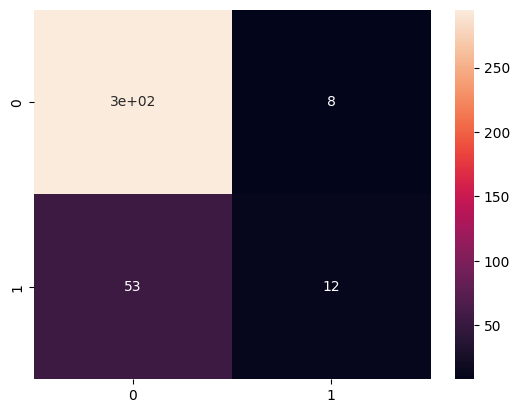

In [ ]:
srn.heatmap(confusao2, annot=True);

In [ ]:
score1 = accuracy_score(y_test, previsoes)
score1

0.8342391304347826

In [ ]:
score2 = precision_score(y_test, previsoes)
score2

0.6

In [ ]:
score3 = recall_score(y_test, previsoes)
score3

0.18461538461538463

In [ ]:
pos_prob = logistic.predict_proba(X_test)

In [ ]:
pos_prob = pos_prob[:,1]
pos_prob

array([0.02250825, 0.14990014, 0.06534003, 0.00684237, 0.28980929,
       0.27220102, 0.14614681, 0.50265146, 0.07476523, 0.2004641 ,
       0.04913005, 0.10308135, 0.27040954, 0.01648062, 0.23991033,
       0.0456441 , 0.14200395, 0.02447307, 0.12712447, 0.11465452,
       0.31201022, 0.16919779, 0.04114297, 0.18138251, 0.09584899,
       0.04069166, 0.01354953, 0.01388008, 0.08812885, 0.35087214,
       0.18658063, 0.01061905, 0.12439104, 0.04819626, 0.25670644,
       0.02185829, 0.01154753, 0.32137072, 0.00983672, 0.03513133,
       0.0836063 , 0.06999718, 0.08352858, 0.01832163, 0.15004003,
       0.03752306, 0.11709881, 0.03708376, 0.33494032, 0.01696491,
       0.01977198, 0.02209169, 0.01363422, 0.11006678, 0.10260344,
       0.02667181, 0.73845687, 0.03399357, 0.35428723, 0.1782814 ,
       0.02853678, 0.0287544 , 0.01993227, 0.01434149, 0.05396301,
       0.04808579, 0.05277703, 0.18570001, 0.01207281, 0.04488072,
       0.01577967, 0.01273791, 0.10979828, 0.20887079, 0.05637

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pos_prob)

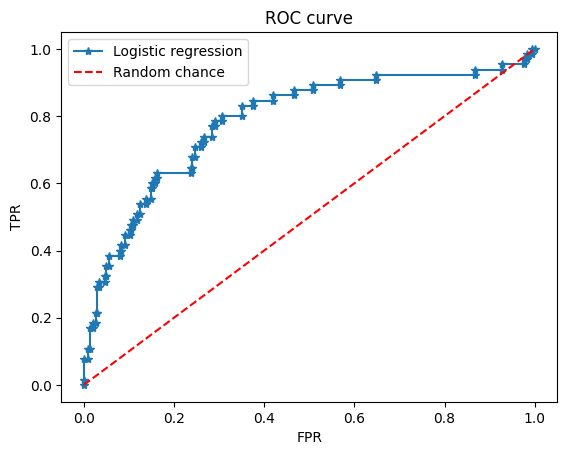

In [ ]:
plt.plot(fpr, tpr,"*-")
plt.plot([0,1], [0,1], "r--")
plt.legend(["Logistic regression", "Random chance"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve");

In [ ]:
roc_auc_score(y_test, pos_prob)

0.7866971312515867

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test,pos_prob)

In [ ]:
precision

array([0.17663043, 0.17711172, 0.17759563, 0.17534247, 0.17582418,
       0.17630854, 0.17679558, 0.17451524, 0.175     , 0.17548747,
       0.17318436, 0.17366947, 0.1741573 , 0.17464789, 0.17514124,
       0.17563739, 0.17613636, 0.17663818, 0.17714286, 0.17765043,
       0.17816092, 0.17867435, 0.17919075, 0.17971014, 0.18023256,
       0.18075802, 0.17836257, 0.17888563, 0.17941176, 0.179941  ,
       0.18047337, 0.1810089 , 0.18154762, 0.18208955, 0.18263473,
       0.18318318, 0.18373494, 0.18429003, 0.18484848, 0.18541033,
       0.18597561, 0.18654434, 0.18711656, 0.18769231, 0.1882716 ,
       0.18575851, 0.1863354 , 0.18691589, 0.1875    , 0.18808777,
       0.18867925, 0.18927445, 0.18987342, 0.19047619, 0.1910828 ,
       0.19169329, 0.19230769, 0.19292605, 0.19354839, 0.19417476,
       0.19480519, 0.19543974, 0.19607843, 0.19672131, 0.19736842,
       0.1980198 , 0.1986755 , 0.19933555, 0.2       , 0.2006689 ,
       0.20134228, 0.2020202 , 0.2027027 , 0.20338983, 0.20408

In [ ]:
thresholds

array([0.00190021, 0.00250619, 0.00275525, 0.00339842, 0.0034167 ,
       0.00354394, 0.0049491 , 0.00506178, 0.00514308, 0.00524877,
       0.00595796, 0.00619397, 0.00622221, 0.006286  , 0.00657152,
       0.00672787, 0.00684237, 0.00684945, 0.00697519, 0.00797531,
       0.00854426, 0.00867435, 0.00958149, 0.00972643, 0.00983672,
       0.01061905, 0.01082563, 0.01124939, 0.01154753, 0.01190592,
       0.01207281, 0.0124942 , 0.01273791, 0.01354953, 0.01363422,
       0.01374253, 0.01388008, 0.01401293, 0.01434149, 0.01452545,
       0.01506901, 0.01512633, 0.01562878, 0.01565127, 0.01577967,
       0.01593404, 0.01648062, 0.01696491, 0.01718843, 0.017303  ,
       0.01753888, 0.01775499, 0.01800551, 0.01801598, 0.0182077 ,
       0.01832163, 0.01968543, 0.01977198, 0.01993227, 0.02006921,
       0.02079158, 0.02079751, 0.02099156, 0.0215483 , 0.02178167,
       0.02185829, 0.02188316, 0.02209169, 0.02250825, 0.02289043,
       0.02298901, 0.02302022, 0.02391912, 0.02447307, 0.02481

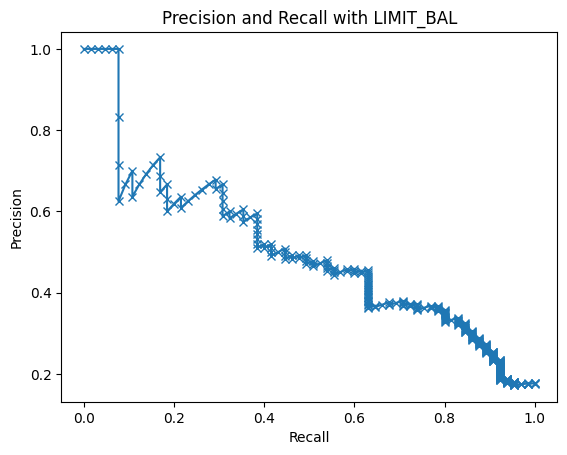

In [ ]:
plt.plot(recall, precision, "-x")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision and Recall with LIMIT_BAL");

In [ ]:
auc(recall, precision)

0.5035803185507417

In [ ]:
#Ajustando o threshold do modelo:
#Para precision por volta de 0.7, podemos, alterando o threshold, melhorar o recall.
#O atual precision é de 0.7 mas há outros pontos 0.7 de precision com recall maior.
custom_threshold = 0.46
predictions = (pos_prob >= custom_threshold).astype(int)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
score4 = accuracy_score(y_test, predictions)
score4

0.845108695652174

In [ ]:
score5 = precision_score(y_test, predictions)
score5

0.6538461538461539

In [ ]:
score6 = recall_score(y_test, predictions)
score6
#Com a otimização do threshold houve uma melhora no recall em 5p.p. sem perder p.p. em precision.

0.26153846153846155

# Treinamento e teste de algoritmo:
  
  2) Naive Bayes:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
modelo = GaussianNB()
modelo.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
previsoes2 = modelo.predict(X_test)
previsoes2

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
confusao1 = confusion_matrix(y_test, previsoes2)
confusao1

array([[202, 108],
       [ 13,  45]])

In [ ]:
precisao1 = accuracy_score(y_test, previsoes2)
precisao1

0.6711956521739131

In [ ]:
precisao2 = precision_score(y_test, previsoes2)
precisao2

0.29411764705882354

In [ ]:
precisao3 = recall_score(y_test, previsoes2)
precisao3

0.7758620689655172

# Treinamento e teste de algoritmo:
  
  3) Random Forest:

In [ ]:
modelo2 = RandomForestClassifier()
modelo2.fit(X_train, y_train)

<ipython-input-130-4e33be628c90>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo2.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
previsoes3 = modelo2.predict(X_test)
previsoes3

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
confusao3 = confusion_matrix(y_test, previsoes3)
confusao3

array([[306,   4],
       [ 39,  19]])

In [ ]:
precisao4 = accuracy_score(y_test, previsoes3)
precisao4

0.8831521739130435

In [ ]:
precisao5 = precision_score(y_test, previsoes3)
precisao5

0.8260869565217391

In [ ]:
precisao6 = recall_score(y_test, previsoes3)
precisao6

0.3275862068965517